# Least Squares Method
## Example 1

### Years of Experience vs Salary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Salary_Data.csv")

In [3]:
years = dataset.iloc[:,0].values
years1 = years
salaries = dataset.iloc[:,1].values
salaries = np.array([i/1000 for i in salaries])

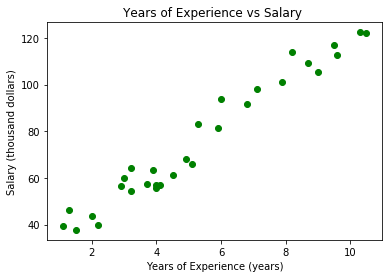

In [4]:
plt.xlabel("Years of Experience (years)")
plt.ylabel("Salary (thousand dollars)")
plt.title("Years of Experience vs Salary ")
plt.scatter(years,salaries,color = "green")
plt.show()

In [5]:
#Creating my class of linear regression with it's constructors and methods
class LinearRegression():
    def __init__(self):
        
        self.theta = []
        
    def fit(self,X,y):
        
        self.theta = np.dot(np.linalg.pinv(X),y)
    
    def predict(self,x):
        
        y = np.dot(x,self.theta)
        return y

In [6]:
years=years.reshape(-1,1)

In [7]:
#Adding the column of ones to get the matrix ready for Linear regression
col_ones = np.ones(30)
col_ones = [[int(i)] for i in col_ones]
years = np.append(col_ones,years,axis = 1)
years = years.astype(float)

In [8]:
regressor = LinearRegression()
regressor.fit(years,salaries)
preds = regressor.predict(years)

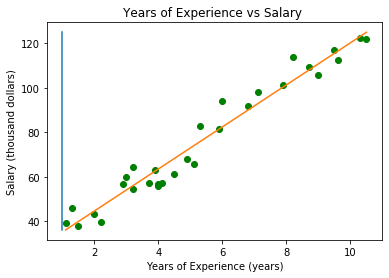

In [9]:
plt.xlabel("Years of Experience (years)")
plt.ylabel("Salary (thousand dollars)")
plt.title("Years of Experience vs Salary ")
plt.scatter(years1,salaries,color = "green")
plt.plot(years,preds)
plt.show()

## Example 2
### Data of an Experiment

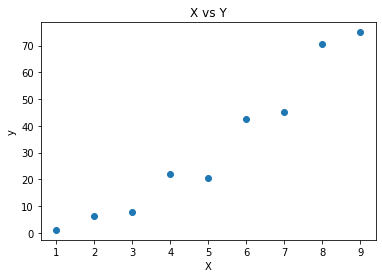

In [70]:
X = [1,2,3,4,5,6,7,8,9]
y = [1.1,6.3,7.6,22.1,20.5,42.4,45.3,70.8,75]
plt.xlabel("X")
plt.ylabel("y")
plt.title("X vs Y")
plt.scatter(X,y)
plt.show()

# Interpolation
## Example 1
### Distance Against Speed

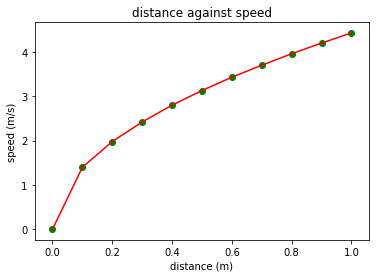

In [11]:
dist = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
speed =[0.0, 1.4, 1.98, 2.42, 2.8, 3.13, 3.43, 3.7, 3.96, 4.2, 4.43]
plt.xlabel("distance (m)")
plt.ylabel("speed (m/s)")
plt.title("distance against speed")
plt.scatter(dist,speed,color = "green")
plt.plot(dist,speed,color = "red")
plt.show()

## Example 2
### time in minute from start of exercise vs concentration of dye in blood (mg/L)

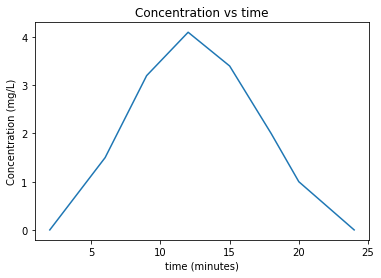

In [12]:
time = [2,6,9,12,15,18,20,24]
conc = [0,1.5,3.2,4.1,3.4,2,1,0]
plt.xlabel("time (minutes)")
plt.ylabel("Concentration (mg/L)")
plt.title("Concentration vs time")
plt.plot(time,conc)
plt.show()

In [21]:
class Lagrange(object):
    
    def __init__(self,X= None,y = None,value = None):
        """
        We need to set the parameters of the class to satisfy the conditions in the equation
        Note that:
        'X' represents the values of x in the x axis
        'y' represents the values of y in the y axis
        'value' represents the value to get for interpolation
        'divs' represents the denomenator of lagrange 
        """
        self.X = X
        self.y = y
        self.value = value
        self.divs = []
        self.origins = []
        self.results = []
        self.output = None
        self.xarr = []
        self.valarr = []
        Sum = None
        
    def setValue(self): self.value = float(input("Value: "))
    
    def setData(self,X,y):
        self.origins.append(X)
        self.origins.append(y)
        self.X = X
        self.y = y
        
    def _Sum(self,results):
        return sum(results)
    
    def getOutput(self):
        self.setValue()
        if self.value in self.X: return self.y[self.X.index(self.value)]
        if self.X ==None or self.y == None: raise ValueError("Provide both arrays of data (X and y)")   
        for i in range(len(self.X)):
            prod = 1
            ups = 1
            for j in range(len(self.X)):
                if self.X[j] == self.X[i]: continue
                prod*=(self.X[i]-self.X[j])
                ups*=(self.value-self.X[j])
            self.divs.append(prod)
            self.results.append((ups*self.y[i])/self.divs[i])
            
        import numpy as np
        self.output = self._Sum(self.results)
        self.X.append(self.value)
        self.y.append(self.output)
        
        if self.value< max(self.X):
            args = np.argsort(self.X)
            temp = []
            for i in args:
                temp.append(self.y[i])
            
            self.X = sorted(self.X)
            self.y = temp
        self.xarr.append(self.value)
        self.valarr.append(self.output)
        return self.output

In [22]:
lagrange = Lagrange(time,conc,13)
lagrange.setData(time,conc)

In [26]:
output = lagrange.getOutput()

Value: 4


In [27]:
output

0.9099785445464439

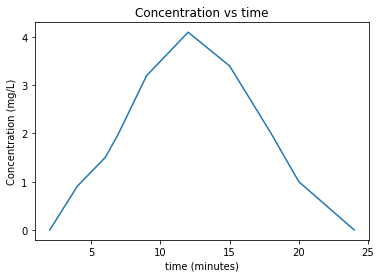

In [28]:
plt.xlabel("time (minutes)")
plt.ylabel("Concentration (mg/L)")
plt.title("Concentration vs time")
plt.plot(lagrange.X,lagrange.y)
plt.show()